In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from scipy import stats
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#bring in the six packs
df_train = pd.read_csv('/content/drive/My Drive/Veri Bilimi Vize/Datasets/train.csv')

# Heat map Çıkartımı
with this way we can see correlations between features

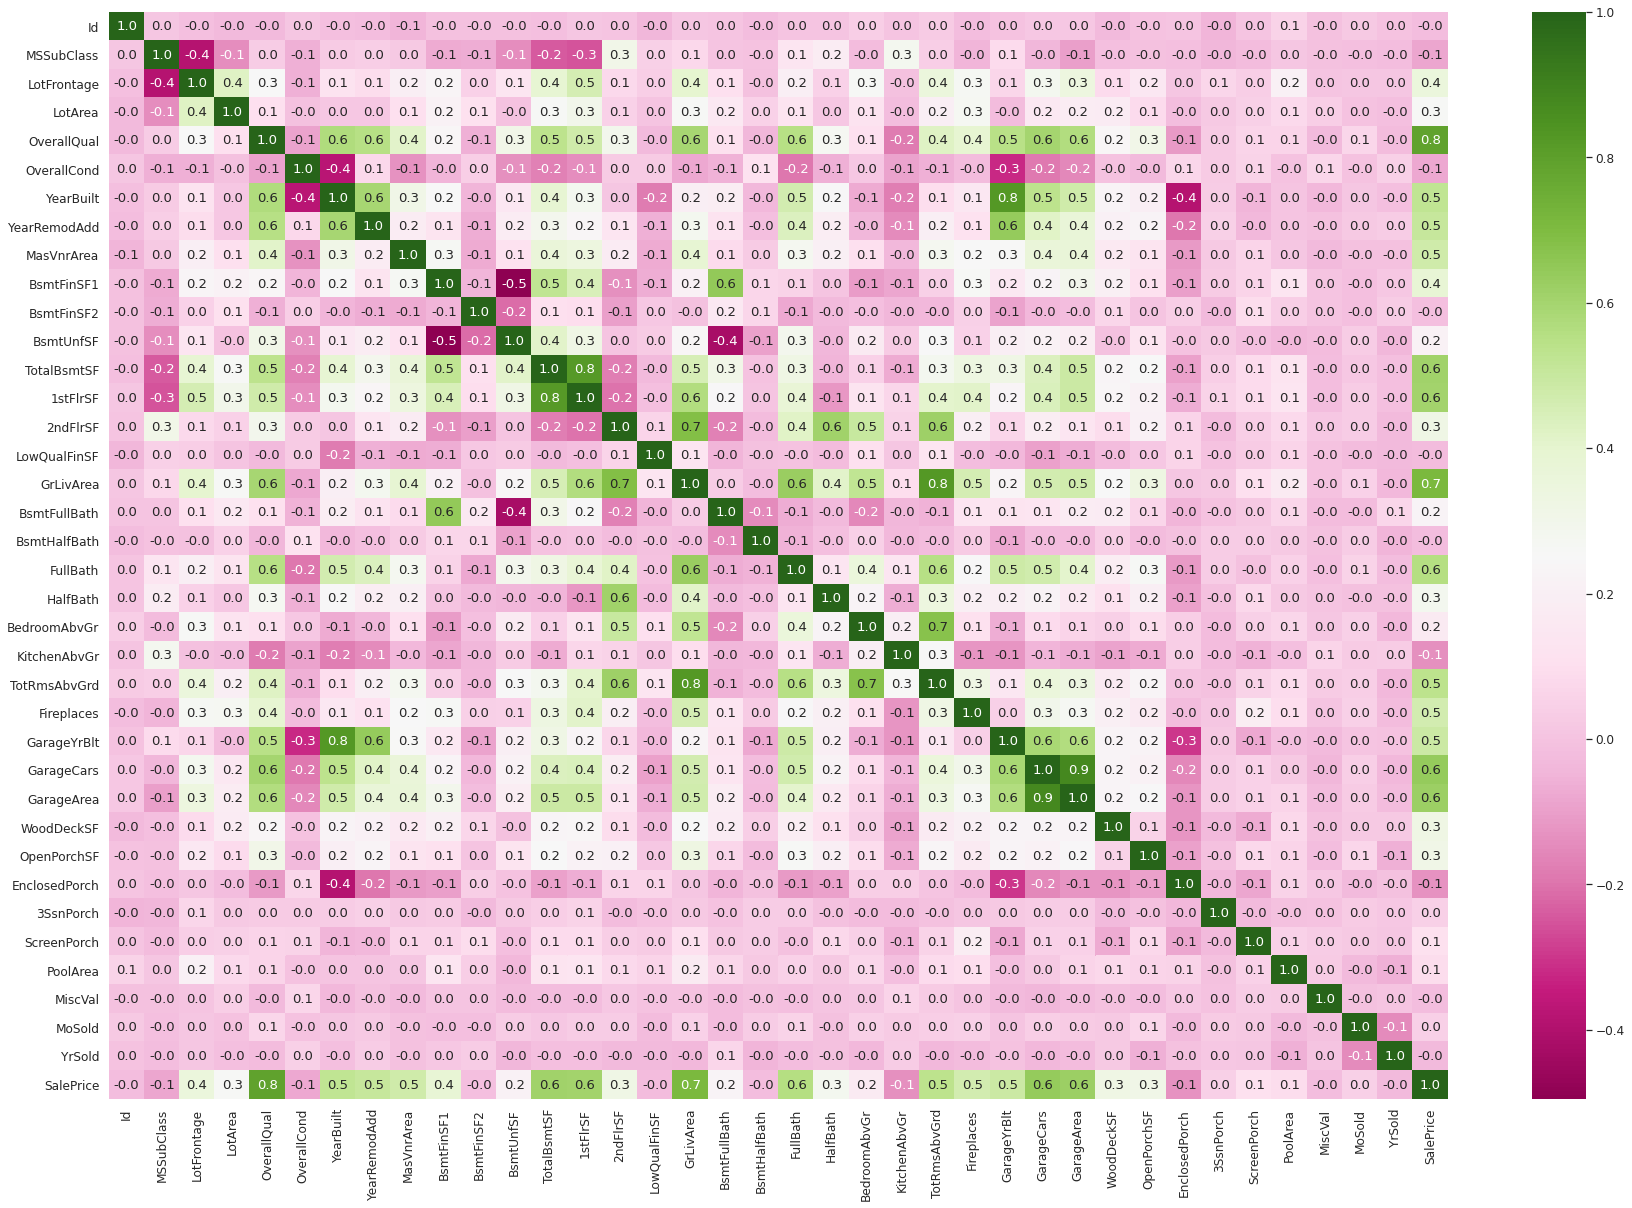

In [0]:
sb.set(font_scale=1.1)  # big
correlation_train=df_train.corr()
plt.figure(figsize=(30,20))
sb.heatmap(correlation_train,annot=True,fmt='.1f',cmap='PiYG')

In [0]:
correlation_train=df_train.corr()

In [0]:
len(df_train)

1460

I decided to use a loop to find important columns, but these columns can be change.

In [0]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.5) & (value<0.9)) | (value <= (-0.1)) :
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'EnclosedPorch',
 'KitchenAbvGr']

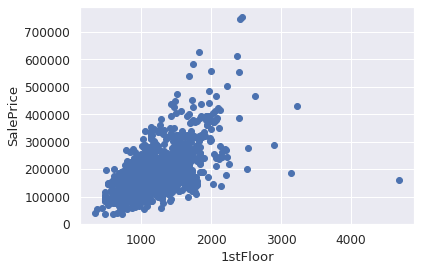

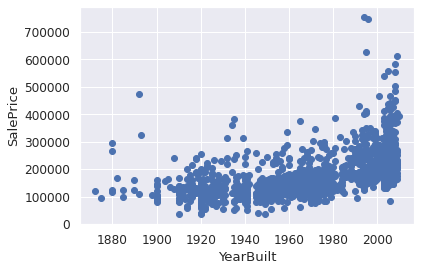

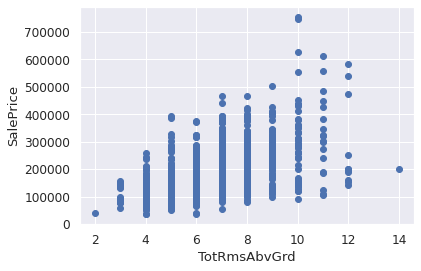

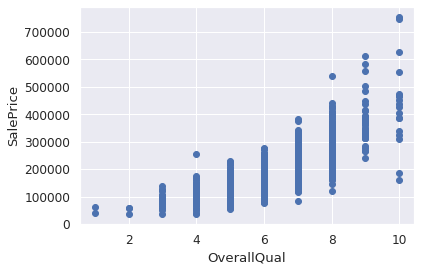

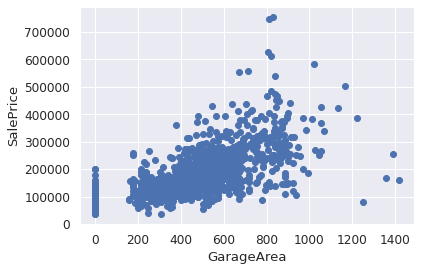

In [0]:
plt.scatter(df_train["1stFlrSF"] ,df_train.SalePrice)

plt.xlabel("1stFloor")
plt.ylabel("SalePrice")
plt.show()

plt.scatter(df_train["YearBuilt"] ,df_train.SalePrice)

plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

plt.scatter(df_train["TotRmsAbvGrd"] ,df_train.SalePrice)

plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

plt.scatter(df_train["OverallQual"] ,df_train.SalePrice)

plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

plt.scatter(df_train["GarageArea"] ,df_train.SalePrice)

plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

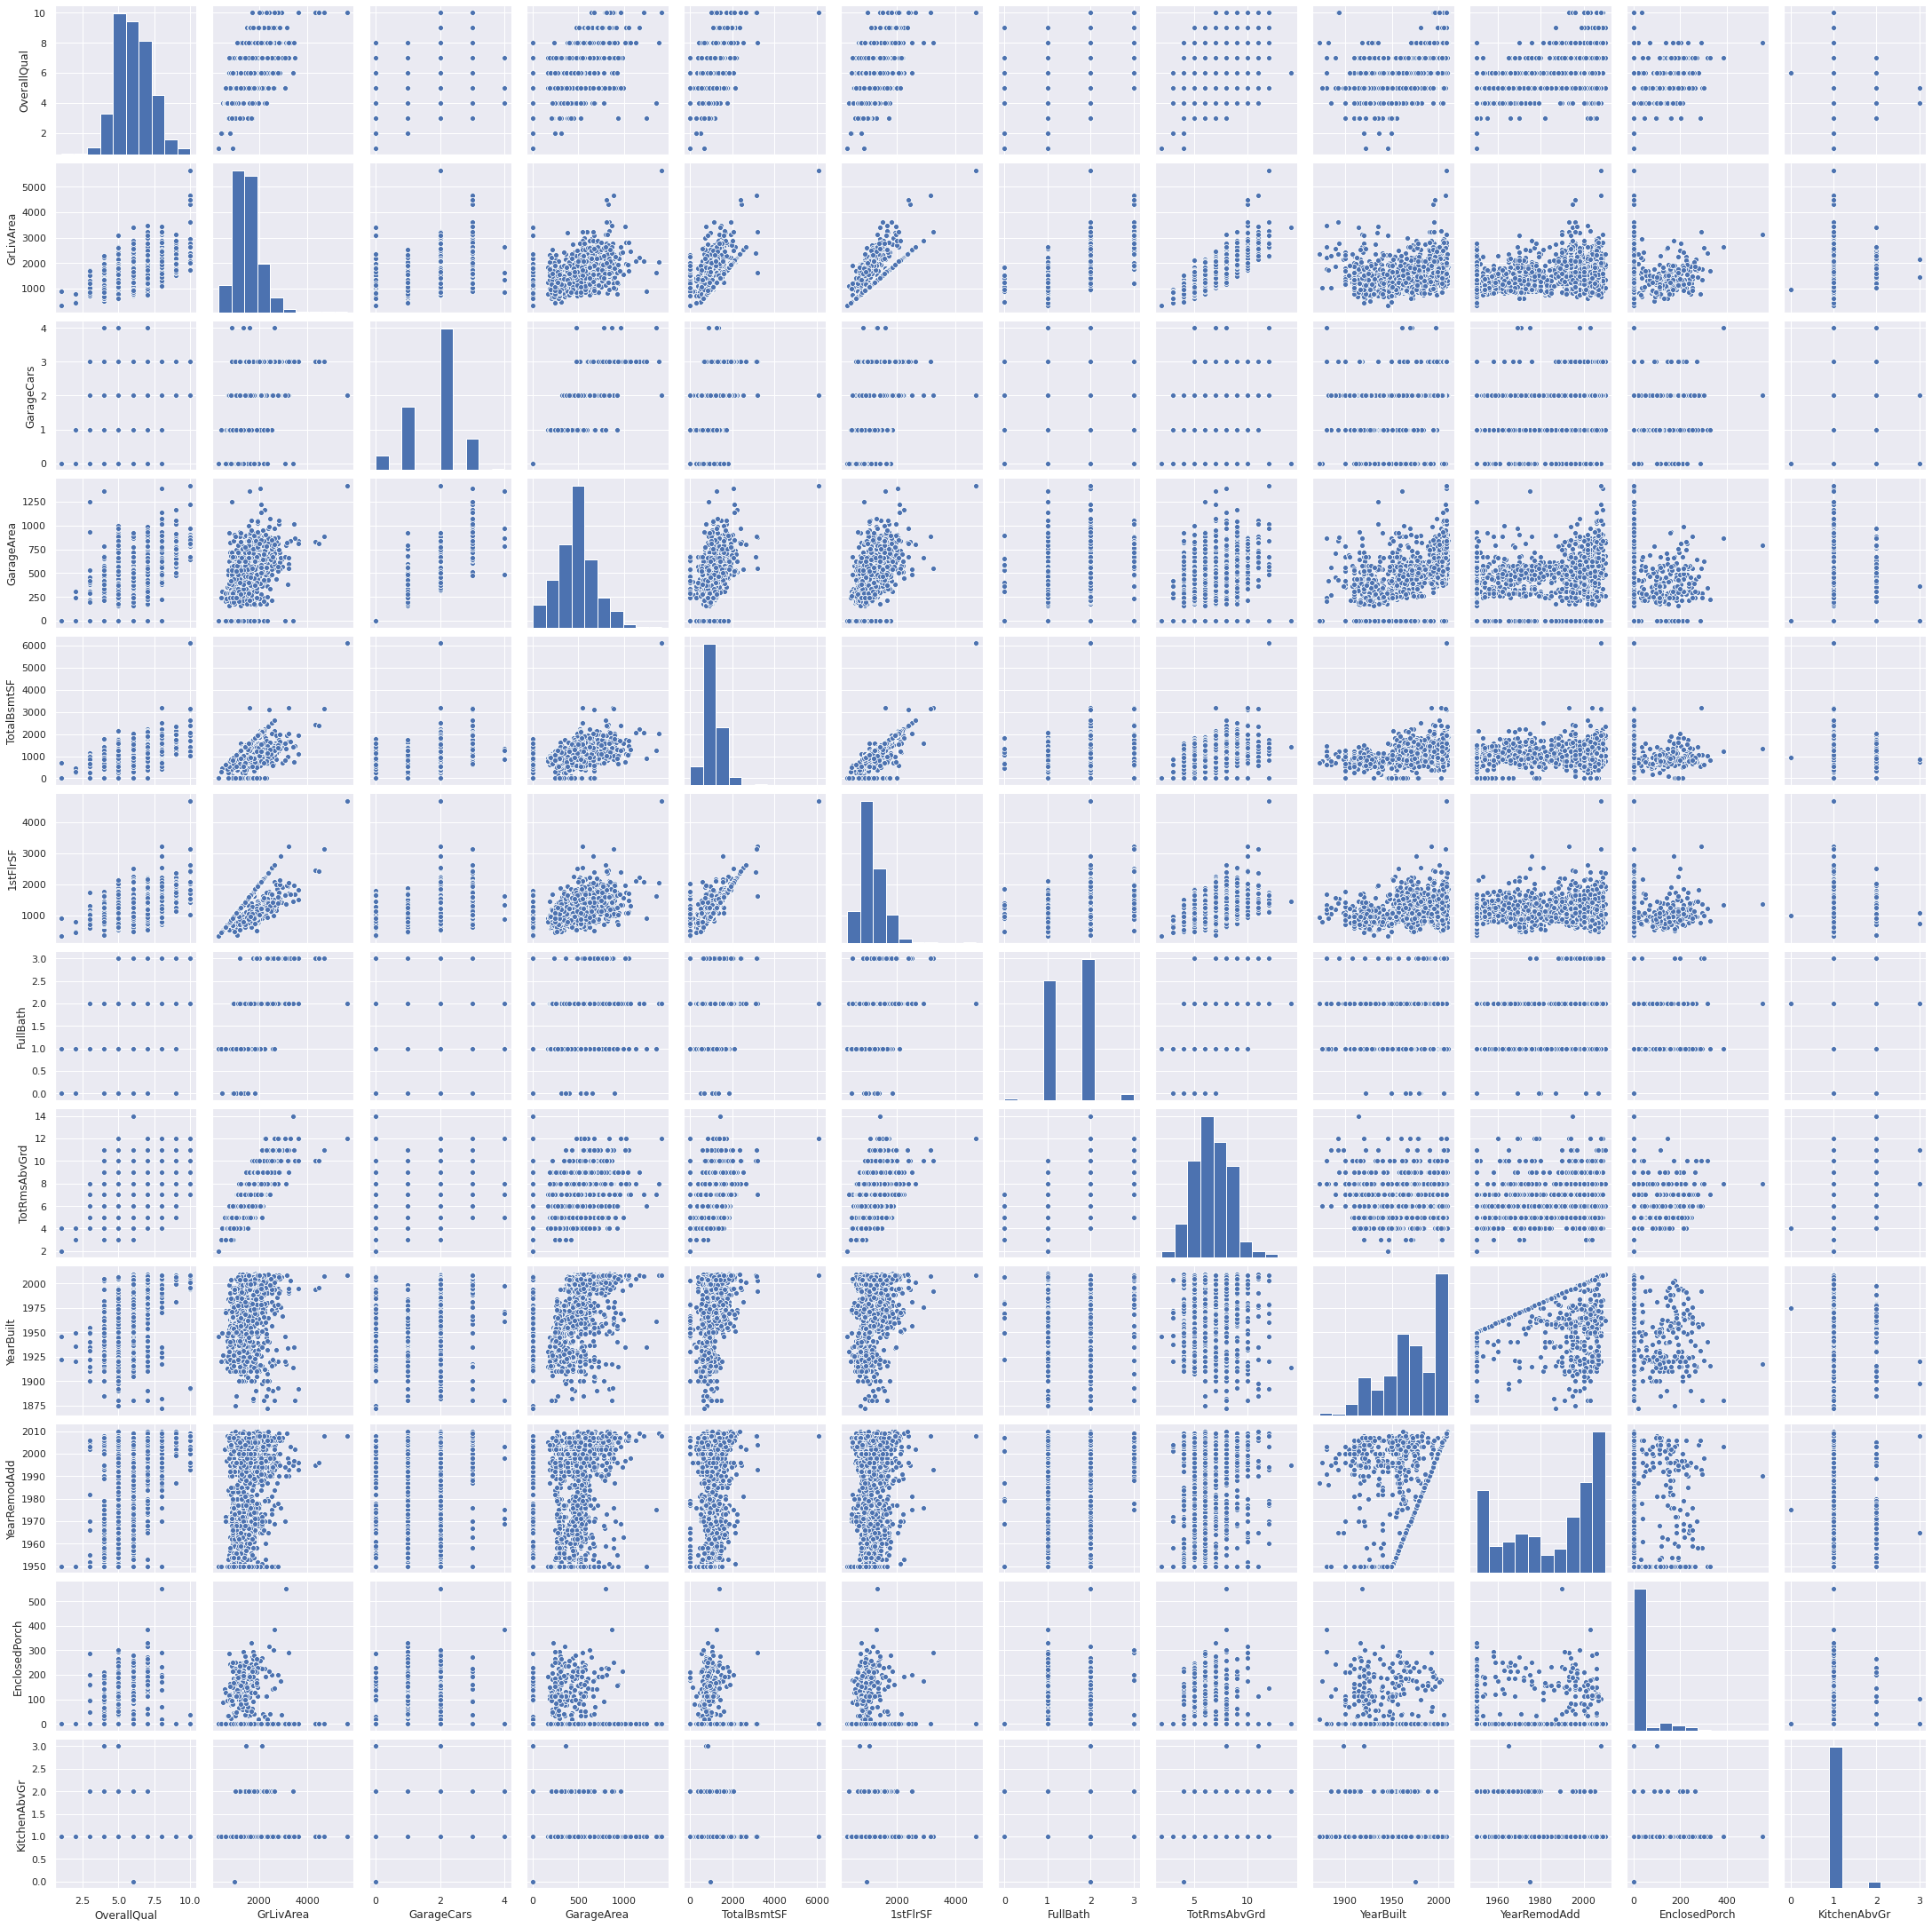

In [0]:
sns.set()

sns.pairplot(df_train[important_columns], size = 2.5)
plt.show();

# MISSING DATA


In [0]:

#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
missing_Ration = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, missing_Ration], axis=1, keys=['Total Missing', 'Missing Ratio'])
missing_data.head(80)

,Total Missing,Missing Ratio
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
1stFlrSF,0,0.000000
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000


In [0]:
df_train = df_train.drop((missing_data[missing_data['Total Missing'] > 0]).index,1)

In [0]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
missing_Ration = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, missing_Ration], axis=1, keys=['Total Missing', 'Missing Ratio'])
missing_data.head(20)

,Total Missing,Missing Ratio
SalePrice,0,0.0
OverallQual,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


In [0]:
len(df_train)

1460

**seçtiğimiz featureların hiçbirinde missing value olmadığı için uğraşmamız gereken bir işlem gerekmemektedir**

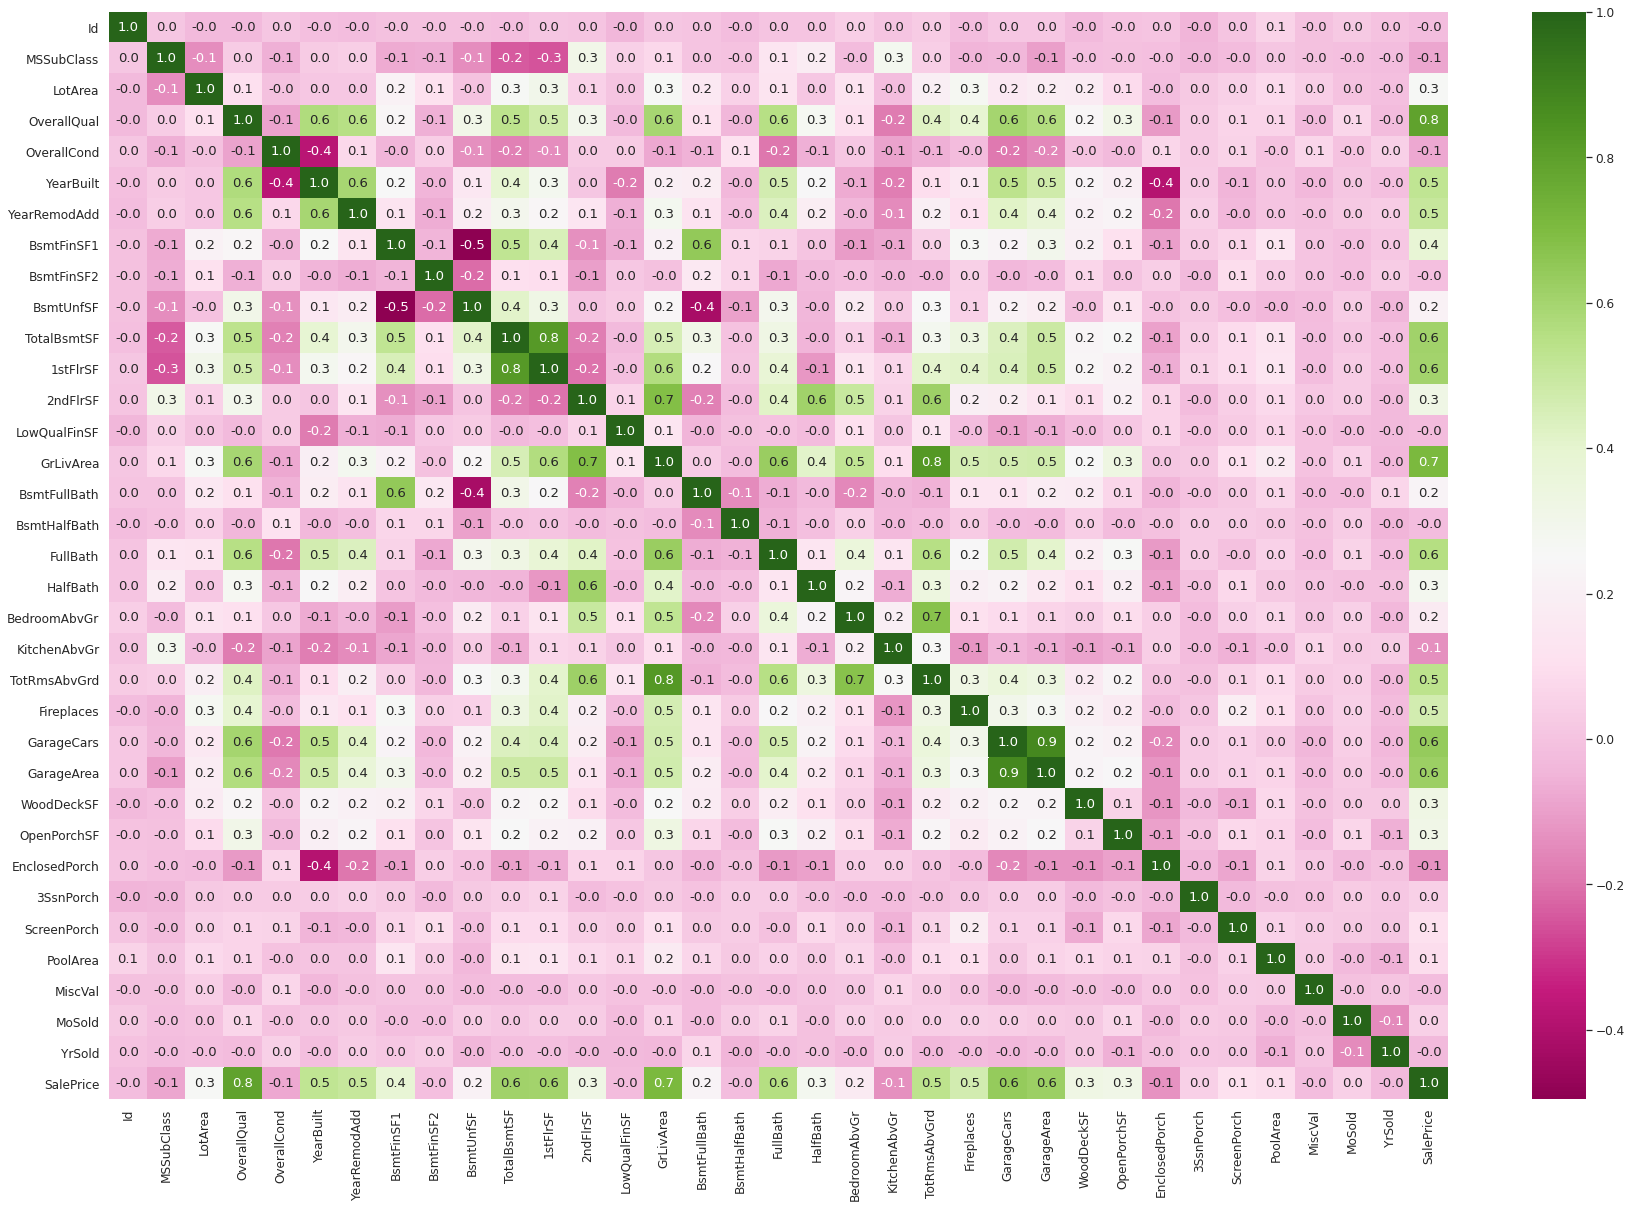

In [0]:
sb.set(font_scale=1.1)  # big
correlation_train=df_train.corr()
plt.figure(figsize=(30,20))
sb.heatmap(correlation_train,annot=True,fmt='.1f',cmap='PiYG')

In [0]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.5) & (value<0.9)) | (value <= (-0.1)) :
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'EnclosedPorch',
 'KitchenAbvGr']

In [0]:
####TEST DATASI 
df_test = pd.read_csv('/content/drive/My Drive/Veri Bilimi Vize/Datasets/test.csv')

In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [0]:
#df_train = pd.read_csv('train.csv')
# Spliting to features and lables and deleting variable I don't need
train_labels = df_train.pop('SalePrice')

features = pd.concat([df_train, df_test], keys=['train', 'test'])

# I decided to get rid of features that have more than half of missing information or do not correlate to SalePrice

for key,value in corr_dict.items():
    if key not in important_columns:
        if (key != 'SalePrice') & (key != '2ndFlrSF') :
            features.drop(key,axis=1, inplace=True)

features

MSZoning Street LotShape  ... PoolQC  Fence MiscFeature
train 0          RL   Pave      Reg  ...    NaN    NaN         NaN
      1          RL   Pave      Reg  ...    NaN    NaN         NaN
      2          RL   Pave      IR1  ...    NaN    NaN         NaN
      3          RL   Pave      IR1  ...    NaN    NaN         NaN
      4          RL   Pave      IR1  ...    NaN    NaN         NaN
...             ...    ...      ...  ...    ...    ...         ...
test  1454       RM   Pave      Reg  ...    NaN    NaN         NaN
      1455       RM   Pave      Reg  ...    NaN    NaN         NaN
      1456       RL   Pave      Reg  ...    NaN    NaN         NaN
      1457       RL   Pave      Reg  ...    NaN  MnPrv        Shed
      1458       RL   Pave      Reg  ...    NaN    NaN         NaN

[2919 rows x 59 columns]

In [0]:
len(important_columns)

12

In [0]:
# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

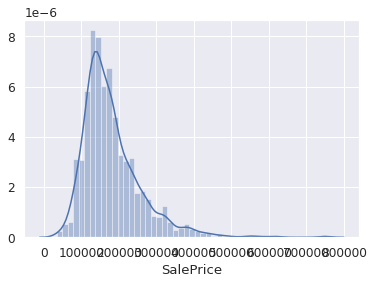

In [0]:
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
ax = sns.distplot(train_labels)

In [0]:
## Log transformation of labels
train_labels = np.log(train_labels)

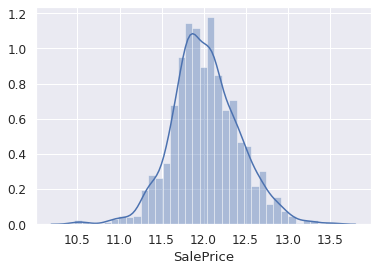

In [0]:
## Now it looks much better
ax = sns.distplot(train_labels)

# Standardizing Numeric Features

In [0]:
## Standardizing numeric features
numeric_features = features.loc[:,['OverallQual','GrLivArea',
                                 'GarageCars',
                                 'GarageArea',
                                 'FullBath',
                                 'TotRmsAbvGrd',
                                 'YearBuilt',
                                 'YearRemodAdd',
                                 'EnclosedPorch',
                                 'KitchenAbvGr', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

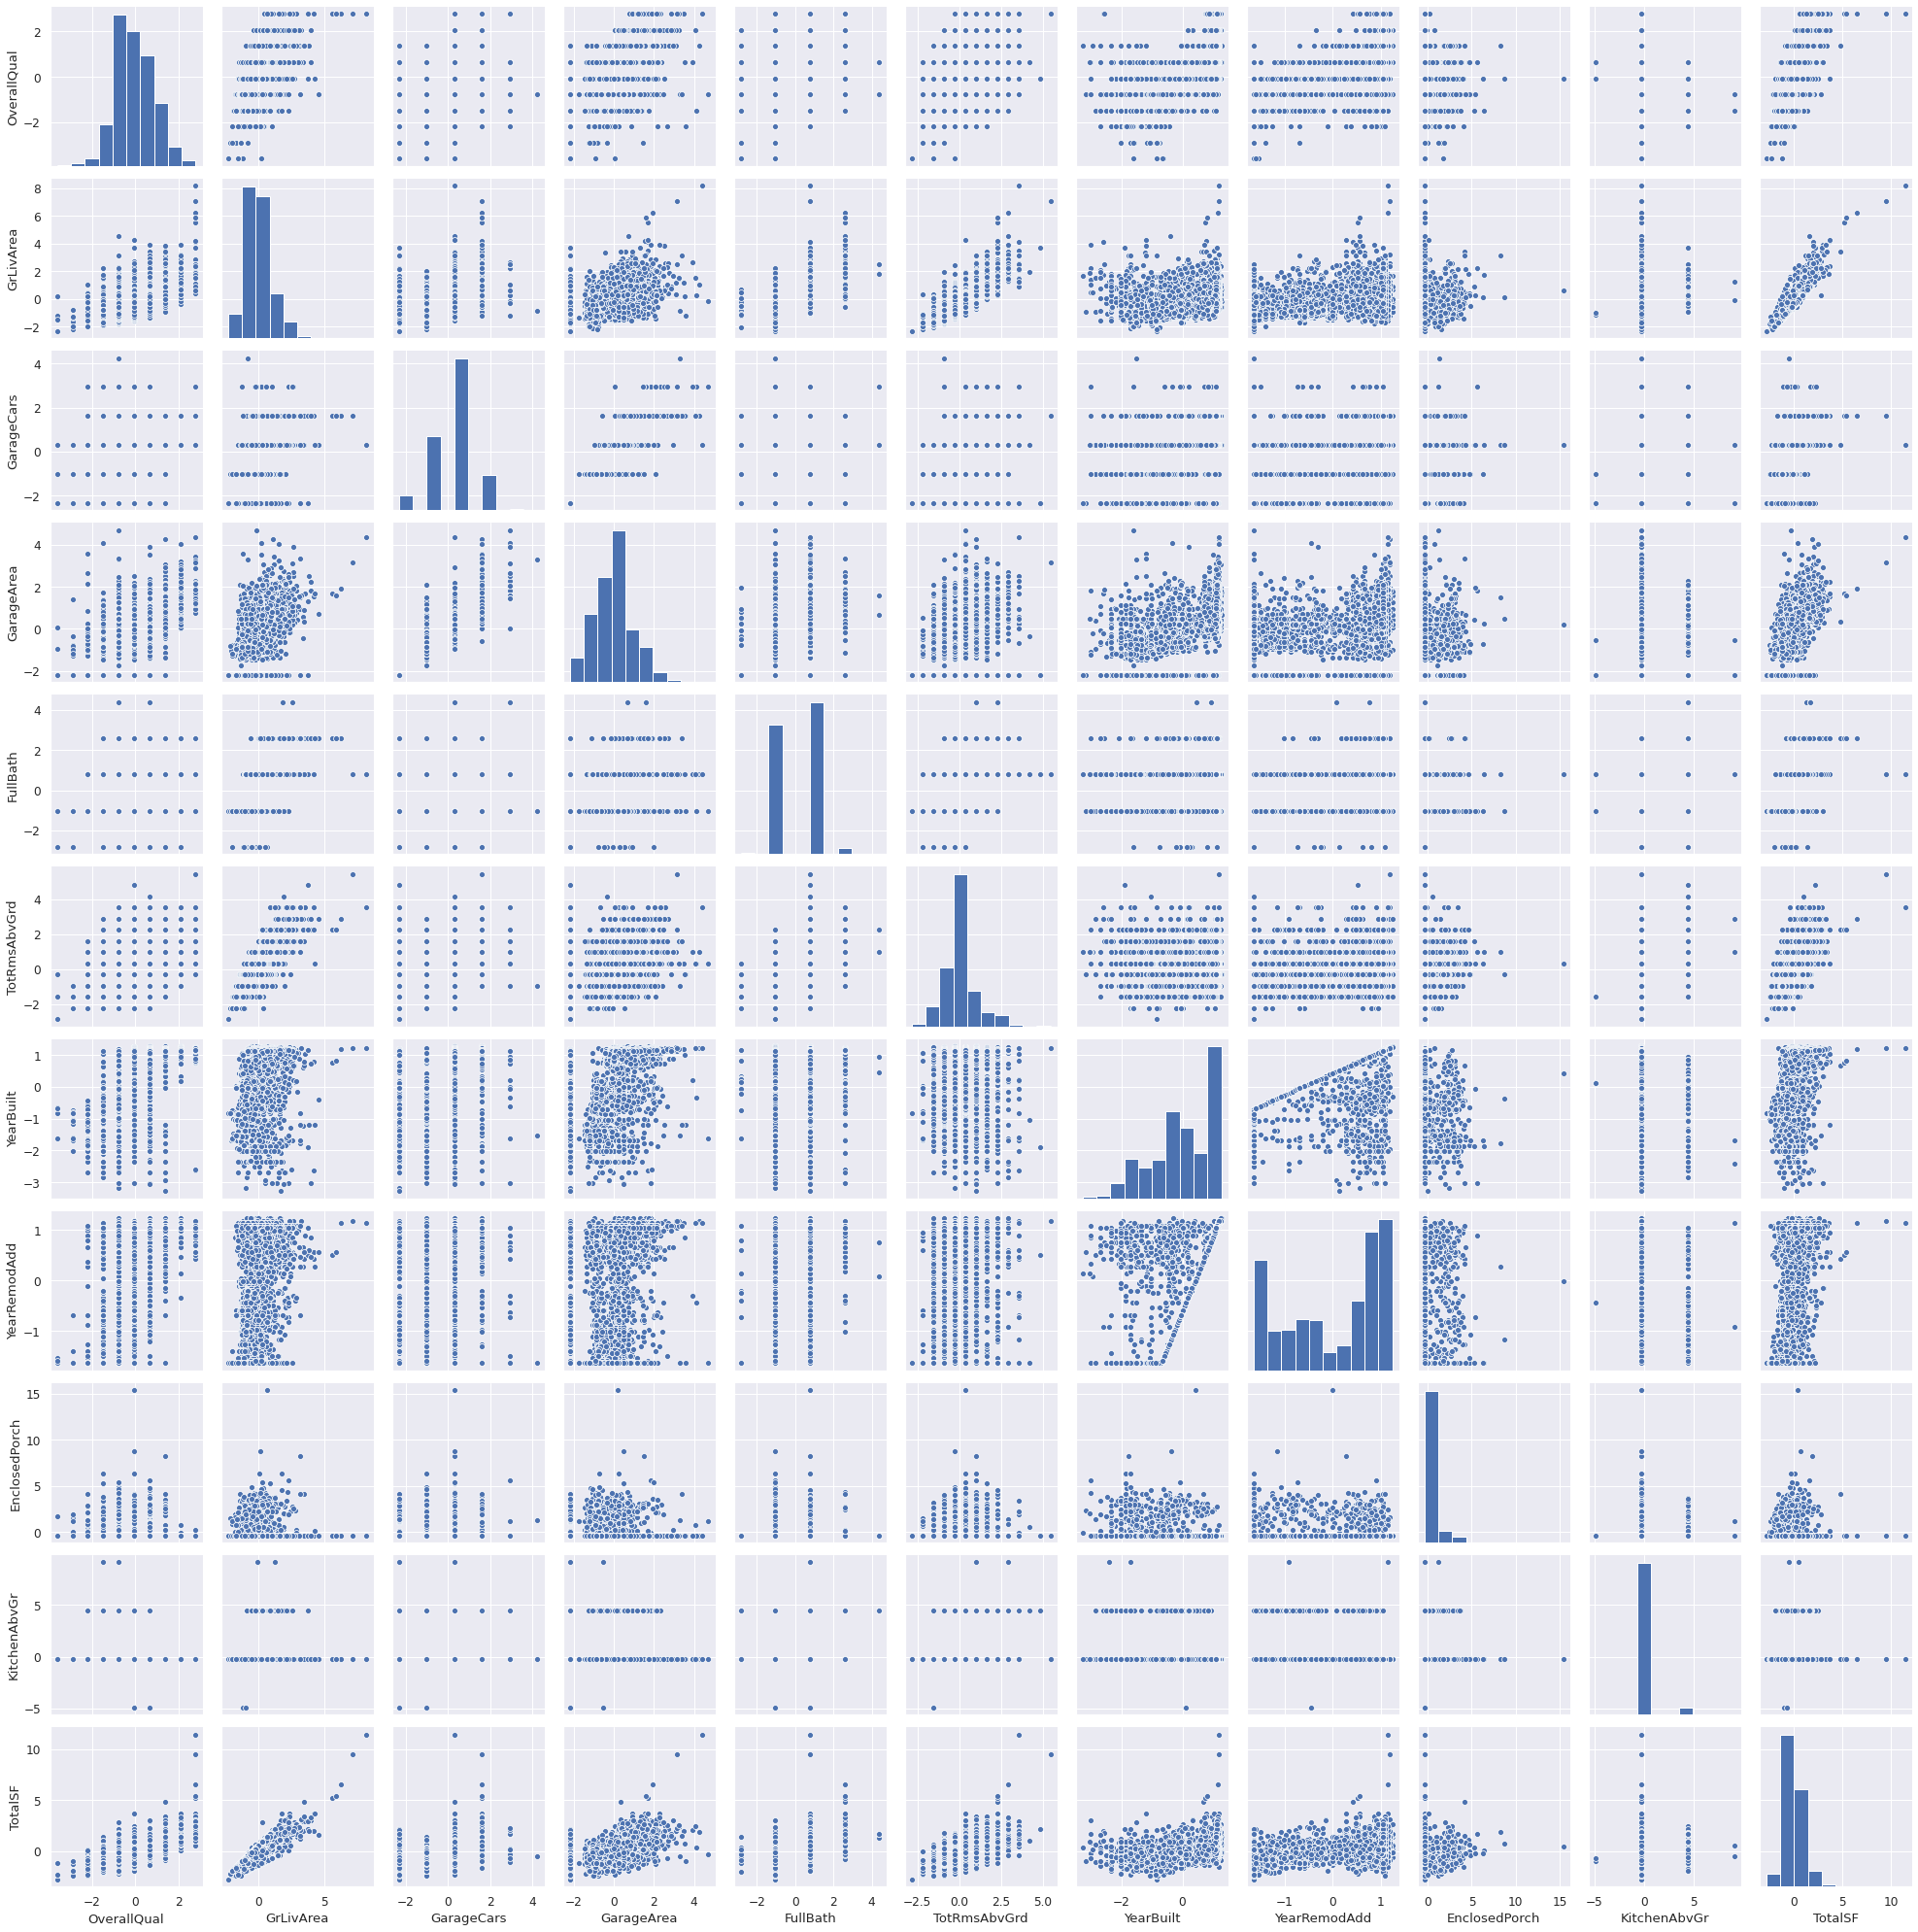

In [0]:
ax = sns.pairplot(numeric_features_standardized)

In [0]:
### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

In [0]:
### Splitting features
train_features = features.loc['train'].select_dtypes(include=[np.number]).values
test_features = features.loc['test'].select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train'].select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].select_dtypes(include=[np.number]).values

In [0]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)


In [0]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.2, random_state=200)

In [0]:
## there was some error about infinit numbers, so I used np.nan_to_num() method. 
## This method can write infinit numbers as limited numbers
x_train=np.nan_to_num(x_train)
x_test=np.nan_to_num(x_test)
y_train=np.nan_to_num(y_train)
y_test=np.nan_to_num(y_test)

x_train_st=np.nan_to_num(x_train_st)
x_test_st=np.nan_to_num(x_test_st)
y_train_st=np.nan_to_num(y_train_st)
y_test_st=np.nan_to_num(y_test_st)

# Linear Regression

In [0]:


X = x_train
y = y_train
# instantiate, fit
lr = LinearRegression()
lr1=lr.fit(X, y)

In [0]:
train_test(lr, x_train, x_test, y_train, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.7801657309665004
RMSE: 0.1717232280704956
Test
R2: 0.8028027625702581
RMSE: 0.1487366732054497


In [0]:
# Retraining models
train_features=np.nan_to_num(train_features)
train_labels=np.nan_to_num(train_labels)
LR_model = lr.fit(train_features, train_labels)

In [0]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(lr1, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.14)


In [0]:
test_features=np.nan_to_num(test_features)
Final_Labels_LR=np.exp(LR_model.predict(test_features))

In [0]:
#pd.DataFrame({'Id': df_test.Id, 'SalePrice': Final_Labels_LR}).to_csv('/content/drive/My Drive/Veri Bilimi Vize/Datasets/Deneme2.csv', index =False)  

# Random Forest


In [0]:

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF=regressor.fit(X,y)

In [0]:
train_test(RF, x_train, x_test, y_train, y_test)

In [0]:
RF_model = regressor.fit(train_features, train_labels)

In [0]:
scores = cross_val_score(RF, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [0]:
Final_Labels_RF=np.exp(RF_model.predict(test_features))

In [0]:
#pd.DataFrame({'Id': df_test.Id, 'SalePrice': Final_Labels_RF}).to_csv('/content/drive/My Drive/Veri Bilimi Vize/Datasets/RF_Deneme.csv', index =False)  

# Combine LR and RF

In [0]:
pd.DataFrame({'Id': df_test.Id, 'SalePrice': ((Final_Labels_RF + Final_Labels_LR)/2)}).to_csv('/content/drive/My Drive/Veri Bilimi Vize/Datasets/RF_LR_Combine.csv', index =False)  